# Homework 6: Hypothesis testing and confidence intervals (50 points)

**Reading**: Textbook chapter [11](https://www.inferentialthinking.com/chapters/11/Testing_Hypotheses) and [13](https://www.inferentialthinking.com/chapters/13/Estimation) .

Please complete this notebook by filling in the cells provided. Before you begin, execute the following cell to load the needed functions. Each time you start your server, you will need to execute this cell again to load them.  

Homework 6 is due Tuesday, 11/20 at 9:30am. Late work will not be accepted.  

In [21]:
# Don't change this cell; just run it. 

import numpy as np
from datascience import *
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

## 1. Landing a Spacecraft (20 points)##

(Note: This problem describes something that's close to [a real story with a very exciting video](http://www.space.com/29119-spacex-reusable-rocket-landing-crash-video.html), but the details have been changed somewhat.)

SpaceY, a company that builds and tests spacecraft, is testing a new reusable launch system.  Most spacecraft use a "first stage" rocket that propels a smaller payload craft away from Earth, then falls back to the ground and crashes.  SpaceY's new system is designed to land safely at a landing pad at a certain location, ready for later reuse.  If it doesn't land in the right location, it crashes, and the (very expensive) vehicle is destroyed.

SpaceY has tested this system over 1000 times.  Ordinarily, the vehicle doesn't land exactly on the landing pad.  For example, a gust of wind might move it by a few meters just before it lands.  It's reasonable to think of these small errors as random.  That is, the landing locations are drawn from some distribution over locations on the surface of Earth, centered around the landing pad.

Run the next cell to see a plot of those locations (meters away from the center of the landing pad).

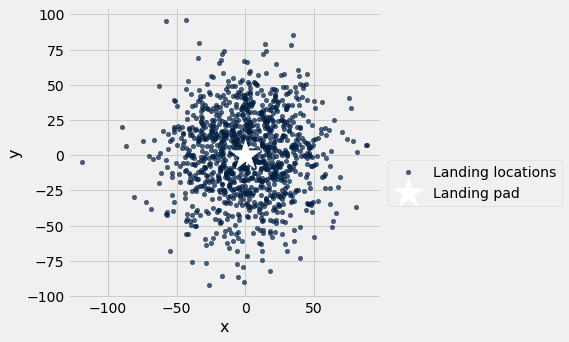

In [22]:
ordinary_landing_spots = Table.read_table("ordinary_landing_spots.csv")
ordinary_landing_spots.scatter("x", "y",label="Landing locations")
plots.scatter(0, 0, c="w", s=1000, marker="*", label="Landing pad")
plots.legend(scatterpoints=1, bbox_to_anchor=(1.6, .5));

During one test, the vehicle lands far away from the landing pad and crashes.  SpaceY investigators suspect there was a problem unique to this landing, a problem that wasn't part of the ordinary pattern of variation in landing locations.  They think a software error in the guidance system caused the craft to incorrectly attempt to land at a spot other than the landing pad.  The guidance system engineers think there was nothing out of the ordinary in this landing, and that there was no special problem with the guidance system.

Run the cell below to see a plot of the 1100 ordinary landings and the crash.

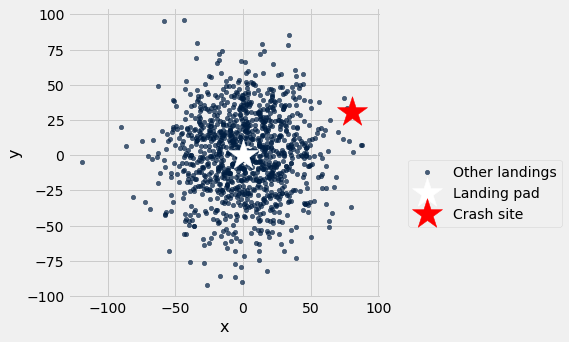

In [23]:
landing_spot = make_array(80.59, 30.91)
ordinary_landing_spots.scatter("x", "y",label="Other landings")
plots.scatter(0, 0, c="w", s=1000, marker="*", label="Landing pad")
plots.scatter(landing_spot.item(0), landing_spot.item(1), marker="*", c="r", s=1000, label="Crash site")
plots.legend(scatterpoints=1, bbox_to_anchor=(1.6, .5));

#### Question 1

Suppose we would like to use hypothesis testing to shed light on this question.  We have written down an alternative hypothesis below.  What is a reasonable null hypothesis?

**Null hypothesis:** This landing was not special; its location was a draw from the distribution from which the other 1100 landing locations were drawn.

**Alternative hypothesis:** This landing was special; its location was a draw from some other distribution, not the distribution from which the other 1100 landing locations were drawn.


#### Question 2
What's a good test statistic?

*Answer here:*  A good test statistic, a quantity derived from the sample that will be used to run a hypothesis test, is the distance from the location from the landing pad. This can be calculated using the distance formula, since the landing pad is at (0,0) and the landings are some diagonal away.

A good test statistic is the distance which equals the square root of x^2 + y^2.

#### Question 3
Write a function called `landing_test_statistic`.  It should take two arguments: an "x" location and a "y" location (both numbers).  It should return the value of your test statistic for a landing at those coordinates.

In [24]:
import math

def landing_test_statistic(x_coordinate, y_coordinate):
    distance = math.sqrt((x_coordinate**2) + (y_coordinate**2))
    return distance

#### Question 4
The cell below computes a P-value using your test statistic.  Does the calculation makes sense for your test statistic? Describe the test procedure in words.  Is there a simulation involved?  If so, what is being simulated? If not, why not?

In [25]:
test_stat = landing_test_statistic(
    landing_spot.item(0),
    landing_spot.item(1))

null_stats = make_array()
for i in np.arange(ordinary_landing_spots.num_rows):
    null_stat = landing_test_statistic(
        ordinary_landing_spots.column('x').item(i),
        ordinary_landing_spots.column('y').item(i))
    null_stats = np.append(null_stats, null_stat)

p_value = np.count_nonzero(null_stats > test_stat) / len(null_stats)
p_value

0.012727272727272728

The test procedure finds the distance from the landing pad to the landing spots for every landing in the data set using the function I wrote. Then, it evaluates the proportion of the distances that are greater than the distance of the landing spot I'm testing. It divides the number of those that are greater by the number of landings. This gives the proportion of landings that had a distance further out than the landing spot we're testing.

The calculation does make sense for my test statistic. It is essentially saying that 1.3% of landings were further away from the landing spot than our landing sites. Looking at the scatterplot, that seems about right. 

There is no simulation involved because we have the population. We can compare our crash site to every other landing. We don't need to use simulations to estimate a population to test against since we have it already. 

#### Question 5

Do the data suggest that this landing was special? Give a short justification of your answer.

At a 0.05 significance level, the data does suggest that the landing was special. Our data is statistically significant. We reject the null hypothesis because our p-value of 0.013 is less than our significance level of 0.05. Although we cannot confirm that the landing was special, there is a low probability that the landing was just by random chance.

## 2. Plot the Vote (22 points) ##

Four candidates are running for President of Dataland. A polling company surveys 1000 people selected uniformly at random from among voters in Dataland, and it asks each one who they are planning on voting for. After compiling the results, the polling company releases the following proportions from their sample:

|Candidate  | Proportion|
|:------------:|:------------:|
|Candidate C | 0.47 |
|Candidate T | 0.38 |
|Candidate J | 0.08 |
|Candidate S | 0.03 |
|Undecided   | 0.04 |

These proportions represent a uniform random sample of the population of Dataland. We will attempt to estimate the corresponding *population parameters* - the proportions of each kind of voter in the entire population.  We will use confidence intervals to compute a range of values that reflects the uncertainty of our estimate.

The table `voters` contains the results of the survey. Candidates are represented by their initials. Undecided voters are denoted by `U`.

In [26]:
votes = Table().with_column('vote', np.array(['C']*470 + ['T']*380 + ['J']*80 + ['S']*30 + ['U']*40))
num_votes = votes.num_rows
votes.sample()

vote
C
C
T
T
T
C
T
S
C
T


Below, we have give you code that will use bootstrapped samples to compute estimates of the true proportion of voters who are planning on voting for **Candidate C**.

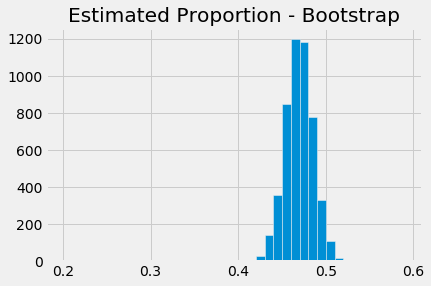

In [27]:
def proportions_in_resamples(nboot):
    statistics = make_array()
    for i in np.arange(nboot):
        bootstrap = votes.sample()
        sample_statistic = np.count_nonzero(bootstrap.column('vote') == 'C')/num_votes
        statistics = np.append(statistics, sample_statistic)
    return statistics

sampled_proportions = proportions_in_resamples(5000)

plots.hist(sampled_proportions,bins=np.arange(0.2,0.6,0.01))
plots.title("Estimated Proportion - Bootstrap")
plots.show()

**Question 1.** Using the array `sampled_proportions`, compute an approximate 95% confidence interval for the true proportions of voters planning on voting for candidate C.  (Compute the lower and upper ends of the interval, named `lower_bound` and `upper_bound`, respectively.)

In [28]:
c_lower_bound = np.quantile(sampled_proportions,0.005) 
c_upper_bound = np.quantile(sampled_proportions,0.995)
print("Bootstrapped 95% confidence interval for the proportion of C voters in the population: [{:f}, {:f}]".format(c_lower_bound, c_upper_bound))

Bootstrapped 95% confidence interval for the proportion of C voters in the population: [0.430000, 0.510000]


**Question 2.** The survey results seem to indicate that Candidate C is beating Candidate T among voters. We would like to use CI's to determine a range of likely values for her true *lead*. Candidate C's lead over Candidate T is:

$$\text{Candidate C's proportion of the vote} - \text{Candidate T's proportion of the vote}.$$

Using the function `proportions_in_resamples` above as a model, use the bootstrap to compute an approximate distribution for Candidate C's lead over Candidate T. Plot a histogram of the the resulting samples.

Also calculate a **99% bootstrap confidence interval** for the difference.

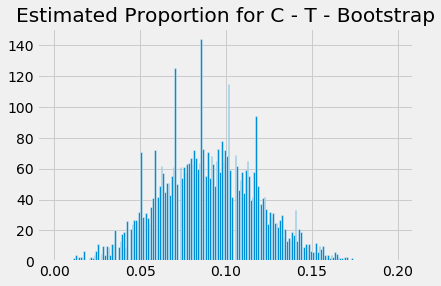

In [29]:
# the code for the histogram in Question 2 is here
def proportions_in_resamples(nboot):
    statistics = make_array()
    for i in np.arange(nboot):
        bootstrap = votes.sample()
        sample_statistic = (np.count_nonzero(bootstrap.column('vote') == 'C') - np.count_nonzero(bootstrap.column('vote') == 'T')) /num_votes
        statistics = np.append(statistics, sample_statistic)
    return statistics

sampled_proportion_diff = proportions_in_resamples(5000)

plots.hist(sampled_proportion_diff,bins=np.arange(0,0.2,0.001))
plots.title("Estimated Proportion for C - T - Bootstrap")
plots.show()

In [30]:
# the bootstrap confidence interval
diff_lower_bound = np.quantile(sampled_proportion_diff,0.001)
diff_upper_bound = np.quantile(sampled_proportion_diff,0.999)
print("Bootstrapped 99% confidence interval for Candidate C's true lead over Candidate T: [{:f}, {:f}]".format(diff_lower_bound, diff_upper_bound))

Bootstrapped 99% confidence interval for Candidate C's true lead over Candidate T: [-0.002001, 0.172002]


**Question 3.**

Interpret the 99% interval you obtained. What does it tell you about the lead Candidate C has?

There is a 99% probability that the interval [-0.002, 0.178] contains the true lead of Candidate C over candidate T. Since the interval includes 0, the lead is not statistically significant at the 99% confidence level. 



## 3. Interpreting Confidence Intervals (8 points)

The staff computed the following 95% confidence interval for the proportion of Candidate C voters: 

$$[.439, .5]$$

(Your answer might have been different; that doesn't mean it was wrong.)

#### Question 1
Can we say that 95% of the population lies in the range $[.439, .5]$? Explain your answer. 

No, we cannot. The CI does not tell you what proportion of the population is within the range. Instead, it tells you that in out of all the samples we take, we are 95% confident (there is a 95% probability) that the true population proportion lies within that range. 

Also, the confidence interval is trying to figure out the true proportion of Candidate C voters. It would not make sense for 95% of the population to be within the a proportion. It's like comparing apples and oranges.

#### Question 2
Can we say that there is a 95% probability that the interval [.439, .5] contains the true proportion of the population who is voting for Candidate C? Explain your answer.

Yes, we can. The CI tells you that in out of all the samples we take, we are 95% confident (there is a 95% probability) that the true population proportion lies within that range. 

#### Question 3
Suppose we produced 10,000 new samples (each one a uniform random sample of 1,000 voters) and created a 95% confidence interval from each one. Roughly how many of those 10,000 intervals do you expect will actually contain the true proportion of the population?

We expect that 9,500 intervals will contain the true proportion of the population assuming a 95% confidence interval. 

**Question 4**

The staff also created 80%, 90%, and 99% confidence intervals from one sample, but we forgot to label which confidence interval represented which percentages! Match the interval to the percent of confidence the interval represents. (Write the percentage after each interval below.) **Then**, explain your thought process.

**Answers:**

$[.444,.495]$: 90%

$[.45,.49]$: 80%

$[.43,.511]$: 99%